In [1]:
import sys
import os 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# NOTE(suo): Hack to enable non-package import
sys.path.insert(0, '..')

%matplotlib inline

/home/suo/.cache/bazel/_bazel_suo/179b959b51786362378d993292d897d3/execroot/__main__/bazel-out/release_links/lib/python_env/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
from data.datasets.paired_chexpert import PairedCheXpertDataset, PairedOnlyCheXpertDataset, PairedOnlyCustomSplit

In [4]:
class_names = [
        'No Finding',
        'Enlarged Cardiomediastinum',
        'Cardiomegaly',
        'Lung Opacity',
        'Lung Lesion',
        'Edema',
        'Consolidation',
        'Pneumonia',
        'Atelectasis',
        'Pneumothorax',
        'Pleural Effusion',
        'Pleural Other',
        'Fracture',
        'Support Devices'
    ]

In [ ]:
paired_only_dataset = PairedOnlyCheXpertDataset('/home/suo/data/CheXpert-v1.0', 'train', class_names, None)

In [ ]:
paired_dataset = PairedCheXpertDataset('/home/suo/data/CheXpert-v1.0', 'train', class_names, None)

In [190]:
def sanity_check(dataset):
    for study in dataset.studies:
        if study['labels'][0] > 0 and sum(study['labels'][1:-1]) > 0:
            raise ValueError

In [191]:
sanity_check(paired_dataset)
sanity_check(paired_only_dataset)

In [192]:
def get_dist(studies):
    label_count_zero = np.zeros(14)
    label_count_one = np.zeros(14)

    for study in studies:
        label_count_zero += (study['labels'] == 0) * study['mask']
        label_count_one += (study['labels'] == 1) * study['mask']

    label_count_total = label_count_one + label_count_zero
    
    return label_count_one / label_count_total

In [196]:
paired_positive_ratio = get_dist(paired_only_dataset.studies)
print paired_positive_ratio

[ 0.38709677  0.12903226  0.06451613  0.29032258  0.          0.09677419
  0.03225806  0.          0.16129032  0.03225806  0.09677419  0.          0.
  0.25806452]


In [197]:
population_positive_ratio = get_dist(paired_dataset.studies)
print population_positive_ratio

[ 0.13   0.525  0.33   0.58   0.005  0.21   0.16   0.04   0.375  0.03   0.32
  0.005  0.     0.495]


Text(0.5,1,'Paired Only vs. All')

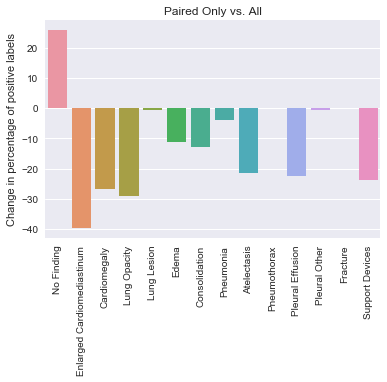

In [198]:
sns.barplot(range(len(paired_positive_ratio)), (paired_positive_ratio - population_positive_ratio) * 100)
plt.ylabel('Change in percentage of positive labels')
plt.xticks(range(len(paired_only_positive_ratio)), class_names, rotation=90)
plt.title('Paired Only vs. All')

# Check Splits

In [216]:
train_split = get_dist(paired_dataset.studies[:30000])
print train_split

[ 1.          0.37320697  0.74422442  0.94975482  0.90627615  0.75987607
  0.39307811  0.70915619  0.96661798  0.2659345   0.75109602  0.89104116
  0.78771331  0.95389911]


In [219]:
train_split = get_dist(paired_dataset.studies[30000:30700])
print train_split

[ 1.          0.34482759  0.75968992  0.94571429  0.95454545  0.75210084
  0.36885246  0.73684211  0.96825397  0.25102881  0.75129534  0.90909091
  0.74193548  0.96287703]


In [221]:
train_split = get_dist(paired_dataset.studies[30700:])
print train_split

[ 1.          0.37550471  0.74973773  0.94923067  0.90001565  0.7569159
  0.39986486  0.71493556  0.96683844  0.26986896  0.75335628  0.92802519
  0.78894212  0.95239684]


In [222]:
len(paired_only_dataset)

31413